In [2]:
import numpy as np, sympy as smp, matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation

plt.style.use(['science','notebook','grid', 'dark_background'])

A particle in space is confined to a 1-D path: $$x=x(\theta)$$ $$y=y(\theta)$$ Pendulum motion can be in many forms, some of which are:
- Parabola: $x=\theta$ and $y=\theta^2$
- Simple Pendulum: $x=\cos(\theta)$ and $y=\sin(\theta)$
- Tautochrome: $x=\sin(2\theta)+2\theta$ and $y=1-\cos(2\theta)$

In [3]:
t, m, g = smp.symbols('t m g')
theta = smp.symbols(r'\theta', cls = smp.Function)

theta = theta(t)
theta_d = smp.diff(theta, t)
theta_dd = smp.diff(theta_d, t)

x, y = smp.symbols('x y', cls = smp.Function)
x = x(theta)
y = y(theta)

Paths:

In [4]:
path = 'Simple Pendulum'  # CHANGE THIS AS YOU PLEASE

if path == 'Parabola':
    x = theta
    y = theta ** 2

    x_f = smp.lambdify(theta, x)
    y_f = smp.lambdify(theta, y)

if path == 'Simple Pendulum':
    x = smp.cos(theta)
    y = smp.sin(theta)

    x_f = smp.lambdify(theta, x)
    y_f = smp.lambdify(theta, y)

if path == 'Tautochrome':
    x = smp.sin(2 * theta) + 2 * theta
    y = 1 - smp.cos(2 * theta)

    x_f = smp.lambdify(theta, x)
    y_f = smp.lambdify(theta, y)

In [5]:
T = 1 / 2 * m * (smp.diff(x, t) ** 2 + smp.diff(y, t) ** 2)
V = m * g * y
L = T - V

Lagrange's Equation: $$\frac{\partial L}{\partial \theta}-\frac{d}{dt}\frac{\partial L}{\partial \dot \theta}=0$$ 

We're solving for $$\dot \theta=\omega$$ $$\dot \omega=\ddot \theta$$

In [6]:
LE = (smp.diff(L, theta) - smp.diff(smp.diff(L, theta_d), t)).simplify()

deriv_1 = theta_d
deriv_2 = smp.solve(LE, theta_dd)[0]

In [7]:
deriv_1f = smp.lambdify(theta_d, theta_d)
deriv_2f = smp.lambdify((g, theta, theta_d), deriv_2)

Define $\vec S=(\theta, \omega)$

In [8]:
def dSdt(S, t):
    return [
        deriv_1f(S[1]),
        deriv_2f(g, S[0], S[1])
    ]

t = np.linspace(0, 20, 1000)
g = 9.807

In [9]:
ans1 = odeint(dSdt, y0 = [2, 0], t = t).T[0]
ans2 = odeint(dSdt, y0 = [3, 0], t = t).T[0]
ans3 = odeint(dSdt, y0 = [4, 0], t = t).T[0]

Text(0, 0.5, '$\\theta$')

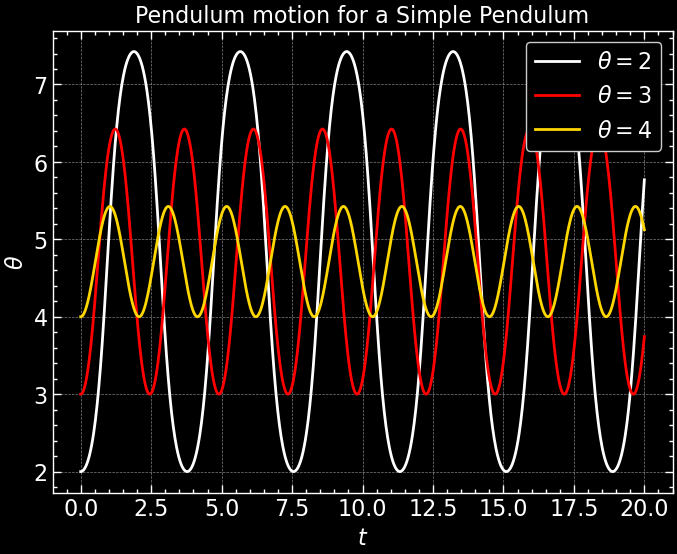

In [10]:
plt.plot(t, ans1, label = r'$\theta=2$', color = 'white')
plt.plot(t, ans2, label = r'$\theta=3$', color = 'red')
plt.plot(t, ans3, label = r'$\theta=4$', color = 'gold')

plt.title('Pendulum motion for a ' + path)
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')

Animation for $x$ and $y$ values:

In [11]:
def xy(theta):
    return x_f(theta), y_f(theta)

x1, y1 = xy(ans1)
x2, y2 = xy(ans2)
x3, y3 = xy(ans3)

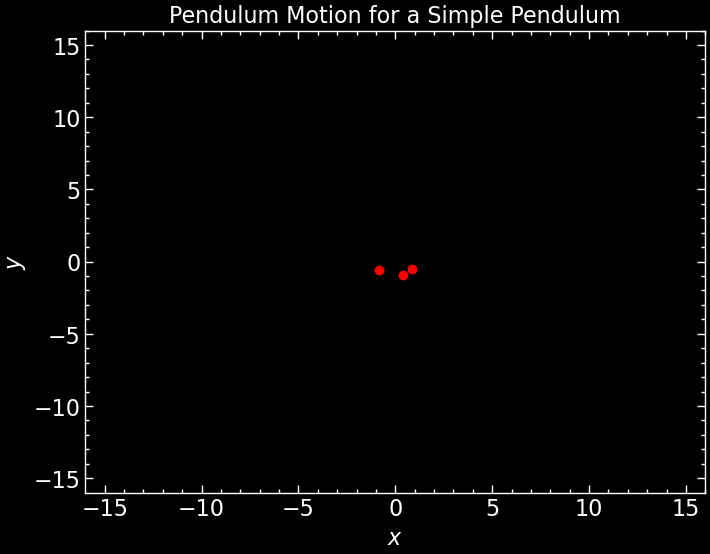

In [12]:
def animate(i):
    ln1.set_data([x1[i]], [y1[i]])
    ln2.set_data([x2[i]], [y2[i]])
    ln3.set_data([x3[i]], [y3[i]])

fig, ax = plt.subplots(1, 1)
ax.grid()
ax.set_title('Pendulum Motion for a {}'.format(path))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

ln1, = plt.plot([], [], 'ro')
ln2, = plt.plot([], [], 'ro')
ln3, = plt.plot([], [], 'ro')

ax.set_xlim(-16, 16)
ax.set_ylim(-16, 16)

ani = animation.FuncAnimation(fig, animate, frames = 1000, interval = 50)
ani.save('..\Outputs\pendulum.gif', writer = 'pillow', fps = 50)